# Task
- For this assignment, we will continue revisiting our first project to predict supermarket sales. We will be applying everything we've learned thus far to explain how our models made their predictions.

In [1]:
## Our standard import
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


## Models & evaluation metrics
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import joblib

# ## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
plt.style.use(('ggplot','tableau-colorblind10'))

# Load Our Saved Joblib File

In [2]:
loaded_joblib = joblib.load('random_forest_l01.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForest'])

In [3]:
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
reg = loaded_joblib['RandomForest']

# Explain our tree-based model with shap:
- Create an X_shap and y_shap variable from our training data (use shap.sample as needed).
- Create a model explainer,
- Calculate the shap values for our model.

In [4]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [5]:
len(X_train_df)

6392

In [6]:
X_shap = shap.sample(X_train_df,nsamples = 200,random_state=SEED)
y_shap = y_train.loc[X_shap.index]
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4469,7.72,0.074669,76.3986,1987.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4438,5.11,0.034868,163.8210,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
366,8.05,0.078386,256.4646,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2219,8.76,0.050131,128.3336,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6080,6.59,0.176748,82.7908,1998.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# Instantiate a Model Explainer with the model
explainer = shap.Explainer(reg)
explainer

In [8]:
X_shap.shape

(200, 1584)

In [9]:
## Get shap values from the explainer
shap_values = explainer(X_shap,y_shap, check_additivity=False)

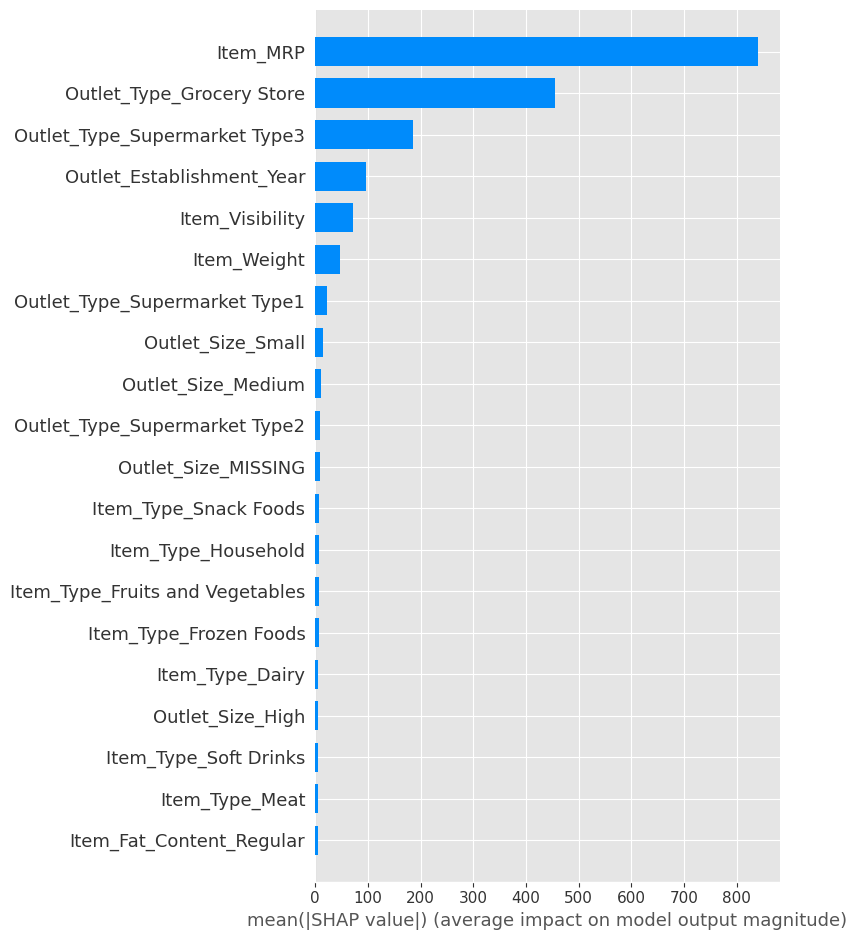

<Figure size 640x480 with 0 Axes>

In [10]:
## create a summary plot (bar version)
shap.summary_plot(shap_values, features = X_shap, plot_type='bar')

# Saving our bar summary plot figure as a .png file
plt.savefig('Data/summary_plot_rf.png', bbox_inches="tight")

## display our saved feature importance image


<img src="Data/importances.png">

## comparing the most important features according to SHAP vs. our original feature importances.
Are they the same features in both? If not, what's different?
  - These are almost idetical with the exception of the outlet type(Supermarket type 3)

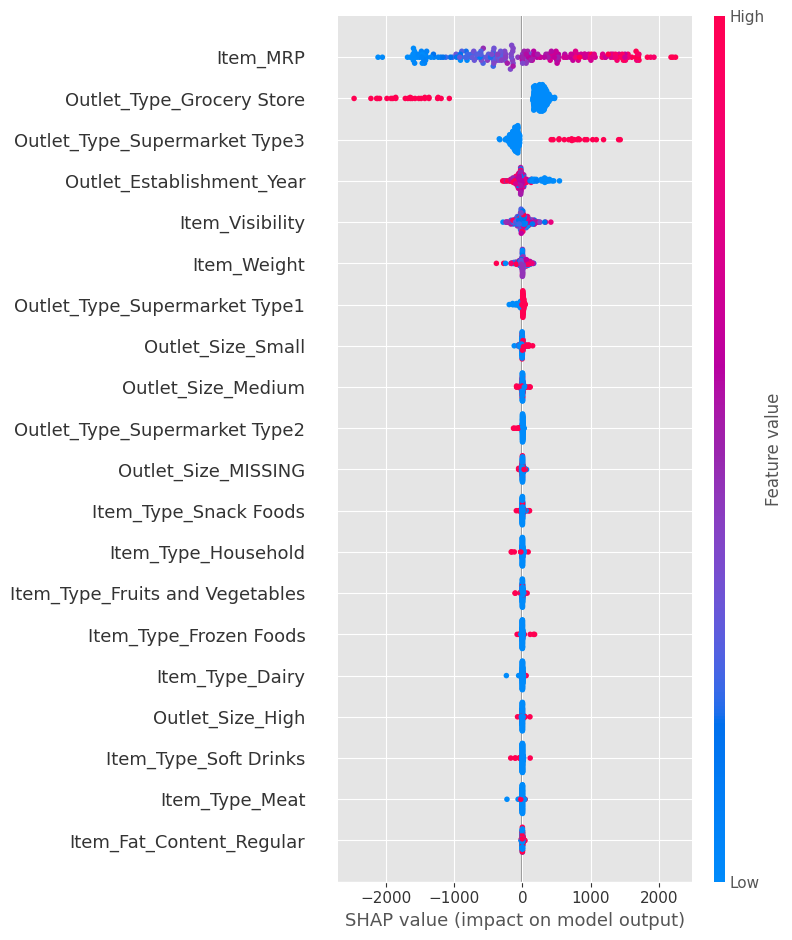

In [11]:
## create a summary plot (dot/default version)
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features = X_shap)

fig.savefig('Data/summary_plot_dot.png')

## Interpret the top 3 most important features and how they influence our model's predictions.
1. Item MRP:
 - The more the item cost the more likely the amount in total sales will increase
2. Outlet type "Grocery Store"
 - Although this "type of outlet is lower on the feature value it seems to affect to amount of sales positively.
3. Outlet Type "Supermarket Type 3":
 - The higher this value is(more of this type of building) the more it increase the amount of sales.
